- **Nama:** Difa Fisabilillah
- **Email:** difafisabilillah91@gmail.com
- **ID Dicoding:** MC401D5X0255

# **1. Import Library**

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00


In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# **2. Memuat Dataset dari Hasil Clustering**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd './drive/MyDrive/Dicoding/Project 2/'

/content/drive/MyDrive/Dicoding/Project 2


In [6]:
df = pd.read_csv('./Dataset inisialisasi.csv')

# **3. Data Splitting**

In [7]:
le = OrdinalEncoder()
df_encode = le.fit_transform(df)

In [8]:
X = df_encode.iloc[:, :-1]
y = df_encode.iloc[:, -1]

In [9]:
X.head()

,age,club_member_status,fashion_news_frequency,product_group_name,price
0,31.0,1,1,1,0.025407
1,31.0,1,2,2,0.011847
2,32.0,1,1,3,0.033881
3,35.0,1,1,4,0.016932
4,24.0,2,1,5,0.016932


In [10]:
y.head()

,clusters
0,0
1,3
2,0
3,0
4,4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train, columns=X.columns)
X_test_scale = pd.DataFrame(X_test, columns=X.columns)

# **4. Membangun Model Klasifikasi**


Sebelum memutuskan model apa yang akan digunakan dilakukan pengujiam telebih dahulu dengan cross validation unutk mengetahui data lebih cocok menggunakan model yang mana

In [13]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()
lg = LogisticRegression()

In [14]:
score_knn = cross_val_score(knn, X_train_scale, y_train, cv=5)
score_dt = cross_val_score(dt, X_train_scale, y_train, cv=5)
score_svm = cross_val_score(svm, X_train_scale, y_train, cv=5)
score_rf = cross_val_score(rf, X_train_scale, y_train, cv=5)
score_nb = cross_val_score(nb, X_train_scale, y_train, cv=5)
score_lg = cross_val_score(lg, X_train_scale, y_train, cv=5)

In [15]:
print(f'KNeighborsClassifier : {score_knn.mean()}')
print(f'DecisionTreeClassifier : {score_dt.mean()}')
print(f'SVM : {score_svm.mean()}')
print(f'RandomForestClassifier : {score_rf.mean()}')
print(f'Naive Bayes : {score_nb.mean()}')
print(f'LogisticRegression : {score_lg.mean()}')

KNeighborsClassifier : 0.9762927166242082
DecisionTreeClassifier : 0.9997543751687399
SVM : 0.9821887683766135
RandomForestClassifier : 0.9995086749230395
Naive Bayes : 0.901487097343451
LogisticRegression : 0.9841539932700154


Pada hasil pengujian dengan cross-validation, terlihat bahwa skor pada sebagian besar model hampir mendekati sempurna. Hal ini bisa menjadi masalah karena kemungkinan overfitting, di mana model terlalu menyesuaikan diri dengan data latihan dan kurang mampu menggeneralisasi pada data baru, sehingga menghasilkan model yang tidak optimal.

## **a. Membangun Model Klasifikasi**

In [16]:
nb = GaussianNB().fit(X_train_scale, y_train)

In [17]:
knn = KNeighborsClassifier().fit(X_train_scale, y_train)

Di sini dipilih model Naïve Bayes dan KNN.
1. Naive Bayes dipilih karena memberikan hasil yang lebih masuk akal dan tidak terlihat overfitting, dibandingkan dengan model lain berdasarkan hasil cross-validation.
2. Model KNN disini sangat tinggi yaitu 98%. KNN dipilih untuk mengetahui apakah akurasi yang tinggi benar-benar mencerminkan performa model, atau justru disebabkan oleh overfitting.

## **b. Evaluasi Model Klasifikasi**

### Evaluasi Data Training Naive Bayes

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2234
           1       1.00      0.90      0.95      1965
           2       0.98      1.00      0.99       297
           3       0.92      1.00      0.96      1802
           4       1.00      0.67      0.80      1843

    accuracy                           0.90      8141
   macro avg       0.94      0.91      0.91      8141
weighted avg       0.92      0.90      0.90      8141

Accuracy : 0.90


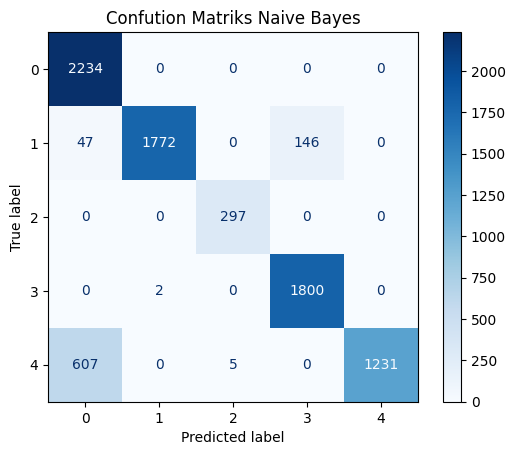

In [19]:
y_pred_nb = nb.predict(X_train_scale)
con_matrix = confusion_matrix(y_train, y_pred_nb)
print(classification_report(y_train, y_pred_nb))
accuracy = accuracy_score(y_train, y_pred_nb)
print(f'Accuracy : {accuracy:.2f}')
matrix_img = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=nb.classes_)
matrix_img.plot(cmap='Blues')
plt.title('Confution Matriks Naive Bayes')
plt.show()

### Evaluasi Data Test Naive Bayes

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       583
           1       1.00      0.89      0.94       432
           2       0.98      1.00      0.99        64
           3       0.93      1.00      0.97       479
           4       1.00      0.62      0.76       478

    accuracy                           0.89      2036
   macro avg       0.93      0.90      0.90      2036
weighted avg       0.91      0.89      0.88      2036

Accuracy : 0.89


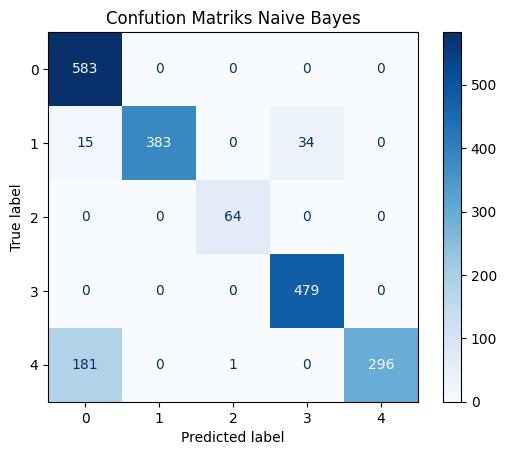

In [20]:
y_pred_nb = nb.predict(X_test_scale)
con_matrix = confusion_matrix(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy : {accuracy:.2f}')
matrix_img = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=nb.classes_)
matrix_img.plot(cmap='Blues')
plt.title('Confution Matriks Naive Bayes')
plt.show()

### Evaluasi Data Training KNN

Classification matrik
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2234
           1       1.00      0.96      0.98      1965
           2       1.00      1.00      1.00       297
           3       0.97      1.00      0.99      1802
           4       1.00      0.99      0.99      1843

    accuracy                           0.99      8141
   macro avg       0.99      0.99      0.99      8141
weighted avg       0.99      0.99      0.99      8141

Accuracy : 0.99


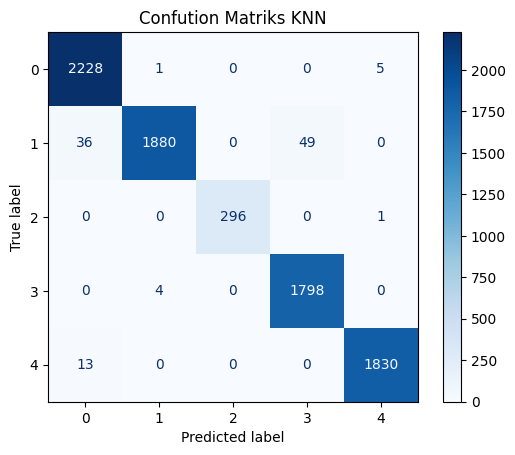

In [21]:
y_pred_knn = knn.predict(X_train)
con_metric = confusion_matrix(y_train, y_pred_knn)
print('Classification matrik')
print(classification_report(y_train, y_pred_knn))
accuracy = accuracy_score(y_train, y_pred_knn)
print(f'Accuracy : {accuracy:.2f}')
matriks = ConfusionMatrixDisplay(confusion_matrix=con_metric, display_labels = knn.classes_)
matriks.plot(cmap='Blues')
plt.title('Confution Matriks KNN')
plt.show()

### Evaluasi Data Test KNN

Classification matrik
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       583
           1       0.99      0.93      0.96       432
           2       1.00      1.00      1.00        64
           3       0.97      0.99      0.98       479
           4       1.00      0.98      0.99       478

    accuracy                           0.98      2036
   macro avg       0.98      0.98      0.98      2036
weighted avg       0.98      0.98      0.98      2036

Accuracy : 0.98


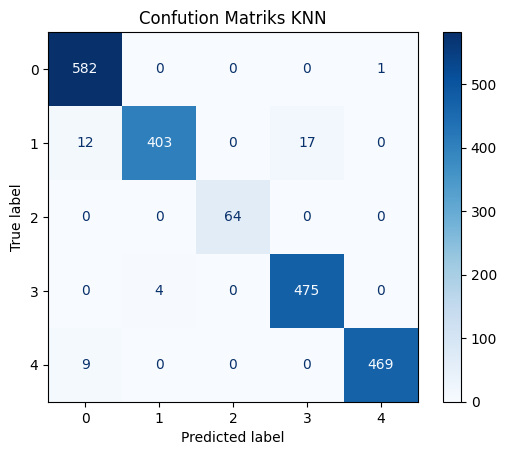

In [22]:
y_pred_knn = knn.predict(X_test_scale)
con_metric = confusion_matrix(y_test, y_pred_knn)
print('Classification matrik')
print(classification_report(y_test, y_pred_knn))
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy : {accuracy:.2f}')
matriks = ConfusionMatrixDisplay(confusion_matrix=con_metric, display_labels = knn.classes_)
matriks.plot(cmap='Blues')
plt.title('Confution Matriks KNN')
plt.show()

Akurasi yang sangat tinggi pada KNN bisa disebabkan oleh kesederhanaan data. fitur yang digunakan terlalu sederhana, model dapat dengan mudah membedakan kelas berdasarkan fitur yang tersedia, sehingga meningkatkan kemungkinan overfitting.

## **Insight : Evaluasi pada data test** <br>
1. Naive Bayes akurasi 0.89
 - Kelas 0: Precision 0.75, Recall 1.00, F1-score 0.86 <br>
   Semua sampel kelas ini berhasil diklasifikasikan dengan benar, namun ada beberapa data dari kelas lain yang salah diklasifikasikan.
 - Kelas 1: Precision 1.00, Recall 0.89, F1-score 0.94 <br>
  Tidak ada kesalahan dalam memprediksi kelas ini, tetapi masih ada 11% sampel dari kelas 1 yang salah diklasifikasikan ke kelas lain.
 - Kelas 2: Precision 0.98, Recall 1.00, F1-score 0.99 <br>
   Kinerja sangat baik, hampir sempurna.
 - Kelas 3: Precision 0.93, Recall 1.00, F1-score 0.97 <b>
  Tidak ada sampel kelas ini yang salah diklasifikasikan, tetapi ada sedikit kesalahan klasifikasi.
- Kelas 4: Precision 1.00, Recall 0.62, F1-score 0.76 <br>
 Model kesulitan dalam mengenali kelas ini, karena hanya 62% sampel yang diklasifikasikan dengan benar.

2. K-Nearest Neighbors (KNN) akurasi 0.98
 - Kelas 0: Precision 0.97, Recall 1.00, F1-score 0.98 <br>
 Hampir sempurna, semua sampel kelas ini diklasifikasikan dengan benar.
 - Kelas 1: Precision 0.99, Recall 0.93, F1-score 0.96 <br>
   secara keseluruhan kinerja masih sangat baik.
 - Kelas 2: Precision 1.00, Recall 1.00, F1-score 1.00 → Performa sempurna.
 - Kelas 3: Precision 0.97, Recall 0.99, F1-score 0.98 <br>
  Hampir tidak ada kesalahan klasifikasi.
 - Kelas 4: Precision 1.00, Recall 0.98, F1-score 0.99 <br>
  Performa sangat baik dibandingkan Naïve Bayes, dengan recall jauh lebih tinggi.




1. Naive Bayes bekerja dengan cukup baik. <br>
Saat diuji pada data pelatihan, model mampu mengenali sebagian besar cluster dengan akurasi 90%. Namun, terdapat beberapa cluster yang sulit dikenali, seperti yang terlihat dari nilai recall, yaitu 67% pada data training dan 62% pada data testing. Hal ini menunjukkan bahwa model masih mengalami kesulitan dalam mendeteksi beberapa kategori secara optimal.

2. KNN menunjukkan akurasi yang hampir sempurna. <br>
Model mencapai 99% akurasi pada data pelatihan dan 98% pada data uji, menunjukkan bahwa model nyaris tidak pernah salah. Selisih akurasi yang sangat tipis antara training dan testing mengindikasikan bahwa model tidak mengalami overfitting dan memang memiliki performa yang sangat baik. Namun, kemungkinan lain adalah bahwa data terlalu sederhana, sehingga pola dalam data lebih mudah dikenali oleh model.

## **c. Tuning Model Klasifikasi (Optional)**

In [23]:
param_dist = {
    'var_smoothing': np.logspace(-9, 0, 10)
}
random_search = RandomizedSearchCV(GaussianNB(), param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scale, y_train)
print(f"Best Params: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Best Params: {'var_smoothing': np.float64(0.01)}
Best Score: 0.9702738147489528


In [26]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
random_search  = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_scale, y_train)
print(f"Best Params: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Params: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Best Score: 0.9804688666567121


Di sini ditemukan bahwa tuning parameter terbaik untuk Naïve Bayes adalah var_smoothing = 0.01. var_smoothing = 0.01 berarti model menambahkan 0.01 kali varian maksimum dari fitur ke semua varian fitur lainnya. Hal ini berguna untuk menstabilkan estimasi varians, terutama ketika terdapat fitur dengan varians yang sangat kecil. Dengan demikian, model menjadi lebih robust dan terhindar dari overfitting terhadap data pelatihan.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [33]:
nb = GaussianNB(var_smoothing=0.01).fit(X_train_scale, y_train)

In [29]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=11, metric='manhattan').fit(X_train_scale, y_train)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2234
           1       1.00      0.92      0.96      1965
           2       0.98      1.00      0.99       297
           3       0.94      1.00      0.97      1802
           4       1.00      0.95      0.98      1843

    accuracy                           0.97      8141
   macro avg       0.97      0.97      0.97      8141
weighted avg       0.97      0.97      0.97      8141

Accuracy : 0.98


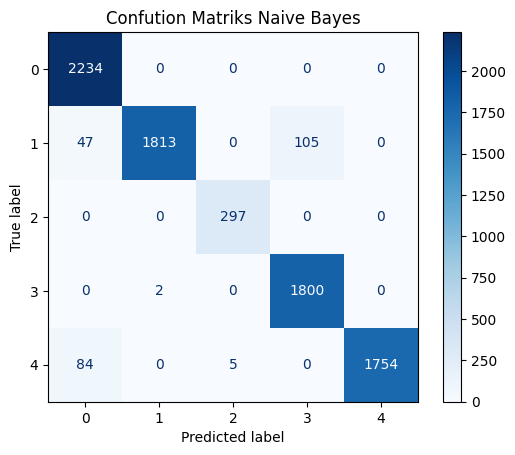

In [30]:
y_pred_nb = nb.predict(X_train_scale)
con_matrix = confusion_matrix(y_train, y_pred_nb)
print(classification_report(y_train, y_pred_nb))
print(f'Accuracy : {accuracy:.2f}')
matrix_img = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=nb.classes_)
matrix_img.plot(cmap='Blues')
plt.title('Confution Matriks Naive Bayes')
plt.show()

Pada KNN, tidak dilakukan tuning karena hasil akurasi sebelumnya sudah mendekati sempurna. Data ini mungkin terlalu sederhana bagi KNN, sehingga model dapat dengan mudah mengenali pola yang ada. Jika tuning dilakukan kembali akurasi yang didapat adalah 100%. akurasi yang sempurna  tidak mungkin terjadi karena biasanya terdapat noise atau variasi dalam data. Selain itu, akurasi yang terlalu tinggi juga dapat menjadi indikasi overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan dan kurang mampu melakukan generalisasi pada data baru.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Sebelum dilakukan tuning, model Naive Bayes memiliki akurasi 90% pada data train dan 89% pada data test. Setelah dilakukan tuning dengan var_smoothing = 0.01, akurasinya meningkat menjadi 98% pada data train, yang menunjukkan peningkatan signifikan.
2. Identifikasi kelemahan model
  - Potensi Overfitting pada Kelas Minor (Class 2)
    * Precision = 0.98, Recall = 1.00, F1 = 0.99, tetapi support hanya 297 (kelas terkecil).
    * Performa sangat tinggi pada kelas minor bisa mengindikasikan model terlalu spesifik atau overfitting ke data latih
  -  Akurasi yang Sangat Tinggi (98%)
    * dataset terlalu mudah/seimbang sehingga model mencapai akurasi sempurna
3. rekomendasi tindakan lanjutan.
  - Teknik Resampling (Oversampling atau Undersampling)
    * misalnya, SMOTE untuk meningkatkan sensitivitas pada Class 1.
  - Eksperimen dengan Algoritma Lain seperti XGBoost